In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("EDA Data Cleaning.csv")
data=data.drop("Unnamed: 0",axis=1)
old_data=pd.read_csv("Churn_Predictions.csv")
data.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,...,Exited,Retirement,EstimatedSalary / Age,CreditScore / Age,NumOfProducts / Tenure,EstimatedSalary / CreditScore,EstimatedSalary / Balance,EstimatedSalary / Tenure,EstimatedSalary / NumOfProducts,CreditScore / Tenure
14053,3,4.0,5.083761,127645.824355,1.041880,1.0,0.0,141416.334800,1.0,0.0,...,1,0.0,0.094201,-0.949526,-0.337474,0.705833,-0.000003,0.338687,135731.832211,-0.225390
11334,5,4.0,2.976705,0.000000,1.000000,1.0,0.0,8577.289137,0.0,0.0,...,1,0.0,-0.925044,-0.298813,0.006276,-0.938336,0.199137,-0.742751,8577.289137,0.763930
6497,5,3.0,9.000000,201009.640000,1.000000,1.0,0.0,158032.500000,0.0,0.0,...,1,0.0,0.297098,-0.420975,-0.642857,0.519896,-0.000011,-0.042936,158032.500000,-0.448611
11232,4,2.0,3.364871,0.000000,1.545043,1.0,0.0,100488.541587,0.0,0.0,...,1,0.0,0.080846,0.144419,0.445595,-0.005579,2.333326,0.327262,65039.312022,0.419996
3397,6,2.0,2.000000,132150.260000,2.000000,1.0,0.0,23067.970000,0.0,0.0,...,0,0.0,-0.708597,1.404756,1.785714,-0.833196,-0.000025,-0.459036,11533.985000,1.758600


In [3]:
data_B=data["Exited"]
data_A=data.drop("Exited",axis=1)

In [4]:
data_A["new_Balance"]=data_A["Balance"].apply(lambda x:0 if x==0 else 1)
data_AB=pd.concat([data_A,data_B],axis=1)
data_AB.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'Geography', 'Retirement',
       'EstimatedSalary / Age', 'CreditScore / Age', 'NumOfProducts / Tenure',
       'EstimatedSalary / CreditScore', 'EstimatedSalary / Balance',
       'EstimatedSalary / Tenure', 'EstimatedSalary / NumOfProducts',
       'CreditScore / Tenure', 'new_Balance', 'Exited'],
      dtype='object')

In [5]:
def pie_plot(column_name,label,title):
    plt.pie(data_AB[column_name].value_counts().values,labels=label,autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show();

0.0    8138
1.0    7788
Name: Gender_Male, dtype: int64


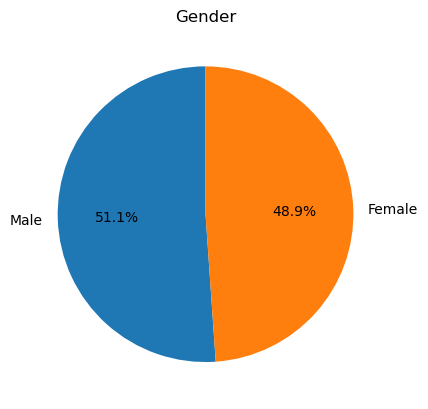

In [6]:
print(data_AB["Gender_Male"].value_counts())
pie_plot(column_name="Gender_Male",label=["Male","Female"],title="Gender")

2.0    5933
3.0    5052
4.0    2146
1.0    2138
5.0     657
Name: Age, dtype: int64


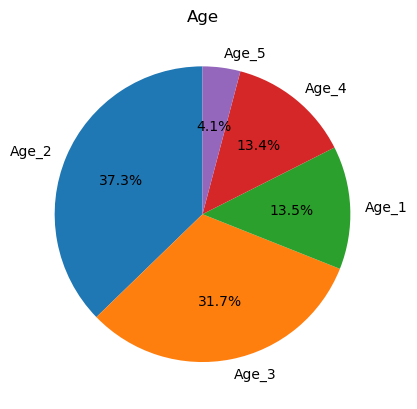

In [7]:
print(data_AB["Age"].value_counts())
pie_plot(column_name="Age", label=["Age_2","Age_3","Age_1","Age_4","Age_5"],title="Age")

5    5991
3    3935
4    3873
6    1263
2     864
Name: CreditScore, dtype: int64


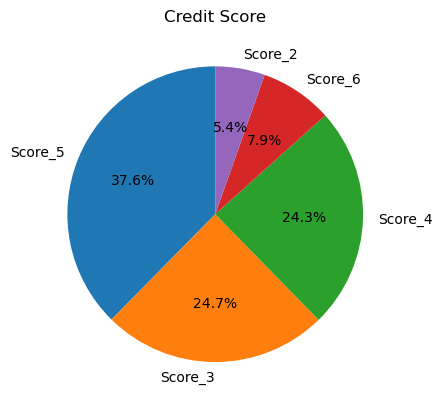

In [8]:
print(data_AB["CreditScore"].value_counts())
pie_plot(column_name="CreditScore",label=["Score_5","Score_3","Score_4","Score_6","Score_2"],title="Credit Score")

1.0    12004
0.0     3922
Name: HasCrCard, dtype: int64


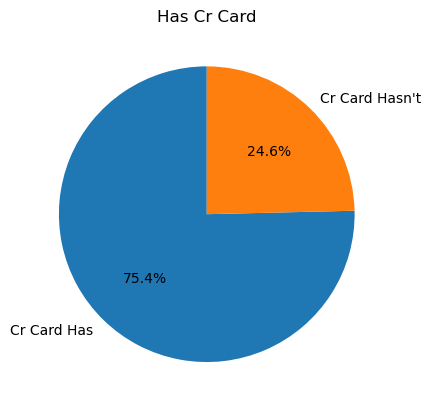

In [9]:
print(data_AB["HasCrCard"].value_counts())
pie_plot(column_name="HasCrCard",label=["Cr Card Has","Cr Card Hasn't"],title="Has Cr Card")

1    10838
0     5088
Name: new_Balance, dtype: int64


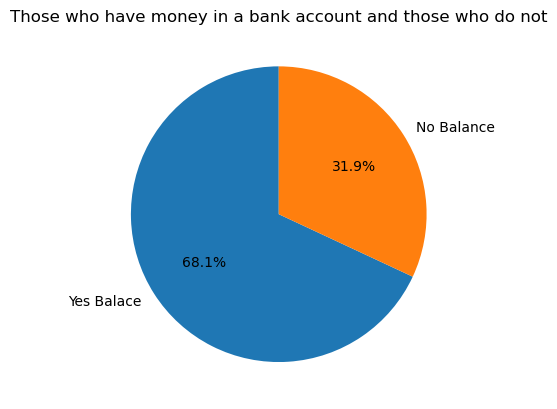

In [10]:
print(data_AB["new_Balance"].value_counts())
pie_plot(column_name="new_Balance",label=["Yes Balace","No Balance"],title="Those who have money in a bank account and those who do not")

0.0    7358
1.0    5388
2.0    3180
Name: Geography, dtype: int64


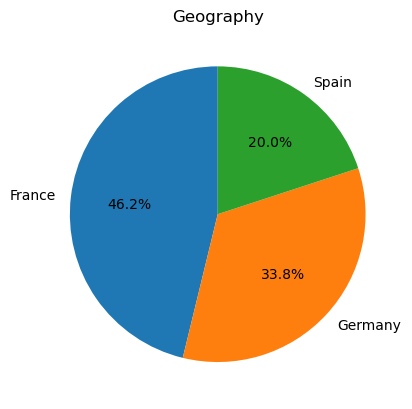

In [11]:
print(data_AB["Geography"].value_counts())
pie_plot(column_name="Geography", label=["France","Germany","Spain"], title="Geography")

In [12]:
groupby_1=data_AB.groupby(["new_Balance"]).sum()["Exited"]
print(groupby_1)

new_Balance
0    1971
1    5992
Name: Exited, dtype: int64


In [13]:
groupby_2=data_AB.groupby(["Gender_Male"]).sum()["Exited"]
print(groupby_2)

Gender_Male
0.0    4734
1.0    3229
Name: Exited, dtype: int64


In [14]:
groupby_3=data_AB.groupby(["HasCrCard"]).sum()["Exited"]
print(groupby_3)

HasCrCard
0.0    1590
1.0    6373
Name: Exited, dtype: int64


In [15]:
groupby_4=data_AB.groupby(["Age"]).sum()["Exited"]
print(groupby_4)

Age
1.0     318
2.0    2020
3.0    3520
4.0    1797
5.0     308
Name: Exited, dtype: int64


In [16]:
groupby_5=data_AB.groupby(["Geography"]).sum()["Exited"]
print(groupby_5)

Geography
0.0    3154
1.0    3693
2.0    1116
Name: Exited, dtype: int64


In [17]:
groupby_6=data_AB.groupby(["Geography","Gender_Male"]).sum()["Exited"]
print(groupby_6)

Geography  Gender_Male
0.0        0.0            1937
           1.0            1217
1.0        0.0            2132
           1.0            1561
2.0        0.0             665
           1.0             451
Name: Exited, dtype: int64


In [18]:
groupby_7=data_AB.groupby(["IsActiveMember","HasCrCard"]).sum()["Exited"]
print(groupby_7)

IsActiveMember  HasCrCard
0.0             0.0          1103
                1.0          4672
1.0             0.0           487
                1.0          1701
Name: Exited, dtype: int64


In [19]:
groupby_8 = data_AB.groupby(['CreditScore','new_Balance']).sum()["Exited"]
print(groupby_8)

CreditScore  new_Balance
2            0               100
             1               282
3            0               509
             1              1507
4            0               511
             1              1551
5            0               738
             1              2265
6            0               113
             1               387
Name: Exited, dtype: int64


In [20]:
groupby_9=data_AB.groupby(["Age","Gender_Male"]).sum()["Exited"]
print(groupby_9)

Age  Gender_Male
1.0  0.0             179
     1.0             139
2.0  0.0            1164
     1.0             856
3.0  0.0            2076
     1.0            1444
4.0  0.0            1124
     1.0             673
5.0  0.0             191
     1.0             117
Name: Exited, dtype: int64
